In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

# A/B Testing on Feature Importance

The purpose of this notebook is to concisely compare two measures of feature importance.

### Data

In [3]:
# Read Data from CSV (NEW DATA, NOT SCALED)
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv", index_col=0)

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# trascurare alcune colonne
df.drop("TTT_freq", axis=1, inplace=True)
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"]
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"]
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

# Collect Features and Labels
features_df = pd.DataFrame()
features_df["occ_total_sum"] = occ
features_df["oldest_phylostratum"] = age
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head(10)

,occ_total_sum,oldest_phylostratum,cds_length,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12.0,1488,0.657258,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1.0,873,0.422680,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1.0,1092,0.572344,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1.0,2800,0.460000,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1.0,1484,0.401617,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.0

### Custom PCA

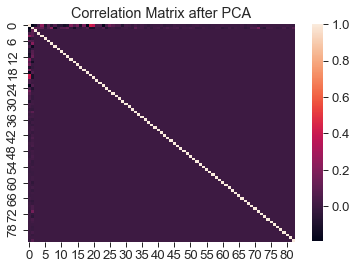

83 total features.
Confounder columns start from index 2 of feature matrix.
Non-counfounders: ['occ_total_sum', 'oldest_phylostratum']


,occ_total_sum,oldest_phylostratum,cds_length,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12.0,1488,0.657258,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1.0,873,0.422680,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1.0,1092,0.572344,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1.0,2800,0.460000,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1.0,1484,0.401617,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.0

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Columns of confounder variables (highly colinear)
conf_index = 2
conf_cols = np.arange(2, X.shape[1])  

class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ 
    Custom PCA transformer for this dataset.
    Applies PCA only to the many collinear confounder 
    variables.
    """
    def __init__(self, confcols, n_components=None, apply_PCA=True):
        self.n_components = n_components
        self.apply_PCA = apply_PCA
        self.confcols = conf_cols
        if self.apply_PCA:
            self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, self.confcols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_conf_pca = self.pca.transform(X[:, self.confcols])
            return np.c_[X[:, :2], X_conf_pca]
        else:
            return X

        
sns.heatmap(pd.DataFrame(ConfounderPCA(confcols=np.arange(2, X.shape[1])).fit_transform(StandardScaler().fit_transform(X))).corr())
plt.title("Correlation Matrix after PCA")
plt.show()

print(X.shape[1], "total features.")
print("Confounder columns start from index", conf_index, "of feature matrix.")
print("Non-counfounders:", features_df.iloc[:, 0:conf_index].columns.tolist())

features_df

### Custom Scoring

In [7]:
from sklearn.metrics import auc, make_scorer, precision_recall_curve


def auprc(y_true, y_scores, **kwargs):
    """ Remember to use make_scorer(auprc, needs_proba=True,) """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    # result is sum of the areas under each curve? no
    # return auc(thresholds, precisions[:-1]) + auc(thresholds, recalls[:-1])
    
    # results is area under x=Recall and y=Precision curve. 
    return auc(recalls, precisions)

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14536, 83) (14536,)
Testing set shape: (3634, 83) (3634,)


# Calculations

In [9]:
from sklearn.inspection import permutation_importance

def calc_importances(model, x, y, scoring='roc_auc', ranseed=0):
    
    # Train the model on the dataset
    model.fit(x, y) 
    
    # Compare the model against other models trained on permutations of the dataset
    results = permutation_importance(model, x, y, n_repeats=10, random_state=ranseed, scoring=scoring, n_jobs=-1)
    
    return pd.DataFrame(results.importances_mean, columns=["Score"], index=features_df.columns)

### Model Definitions

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model_A = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(confcols=np.arange(2, X.shape[1]), n_components=0.95)),
    ("lr", LogisticRegression(max_iter=2000, class_weight=None)),
])

model_B = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(confcols=np.arange(2, X.shape[1]), n_components=0.95)),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
])

imp_A_df = calc_importances(model_A, X_train, y_train, scoring='roc_auc', ranseed=0) 
imp_B_df = calc_importances(model_B, X_train, y_train, scoring='roc_auc', ranseed=1) 

### Model Evaluation

In [11]:
from sklearn.metrics import roc_auc_score

print("Model A roc-auc score:")
print(roc_auc_score(y_test, model_A.predict_proba(X_test)[:,1]))

print("Model B roc-auc score:")
print(roc_auc_score(y_test, model_B.predict_proba(X_test)[:,1]))

Model A roc-auc score:
0.6546988647206557
Model B roc-auc score:
0.657145297990108


In [12]:
print("Model A pr-auc score:")
print(auprc(y_test, model_A.predict_proba(X_test)[:,1]))

print("Model B pr-auc score:")
print(auprc(y_test, model_B.predict_proba(X_test)[:,1]))

Model A pr-auc score:
0.37031732694888925
Model B pr-auc score:
0.3708301908962329


              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2791
           1       0.58      0.05      0.08       843

    accuracy                           0.77      3634
   macro avg       0.68      0.52      0.48      3634
weighted avg       0.73      0.77      0.69      3634



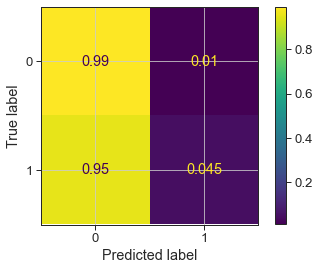

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model A
y_pred = model_A.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.59      0.69      2791
           1       0.31      0.61      0.41       843

    accuracy                           0.59      3634
   macro avg       0.57      0.60      0.55      3634
weighted avg       0.71      0.59      0.63      3634



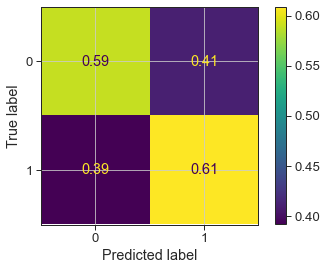

In [14]:
# Model B
y_pred = model_B.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Feature Importances Plotted

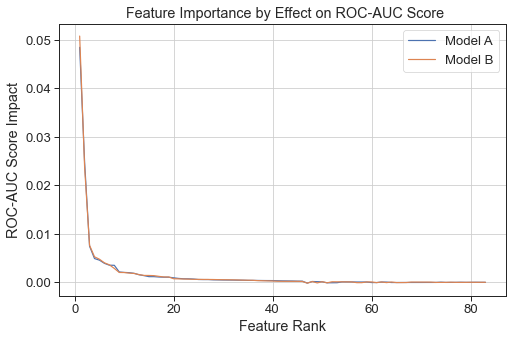

In [17]:
data_A = imp_A_df.sort_values(by="Score", key=abs, ascending=False).to_numpy().flatten()
data_B = imp_B_df.sort_values(by="Score", key=abs, ascending=False).to_numpy().flatten()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=np.arange(1, 84), y=data_A, label="Model A")
sns.lineplot(x=np.arange(1, 84), y=data_B, label="Model B")
plt.title(" Feature Importance by Effect on ROC-AUC Score")
plt.ylabel("ROC-AUC Score Impact")
plt.xlabel("Feature Rank")
plt.show()

### Ranked Importances

In [18]:
results_df = pd.DataFrame()
results_df["Model A"] = imp_A_df["Score"]
results_df["Model B"] = imp_B_df["Score"]
results_df.head(5)

,Model A,Model B
occ_total_sum,0.048431,0.050752
oldest_phylostratum,0.024721,0.023738
cds_length,0.007442,0.007619
gc_cds,-0.000031,-0.000026
dnase_gene,-0.000086,-0.000064


In [19]:
results_df.sort_values(by="Model A", key=abs, ascending=False).head(10)

,Model A,Model B
occ_total_sum,0.048431,0.050752
oldest_phylostratum,0.024721,0.023738
cds_length,0.007442,0.007619
repeat_cds,0.004894,0.005255
TTG_freq,0.004563,0.004754
GTA_freq,0.003909,0.003603
TAC_freq,0.003523,0.002860
TGG_freq,0.003504,0.004016
CTC_freq,0.002128,0.001902
TCT_freq,0.002037,0.001823


In [20]:
results_df.sort_values(by="Model B", key=abs, ascending=False).head(10)

,Model A,Model B
occ_total_sum,0.048431,0.050752
oldest_phylostratum,0.024721,0.023738
cds_length,0.007442,0.007619
repeat_cds,0.004894,0.005255
TTG_freq,0.004563,0.004754
TGG_freq,0.003504,0.004016
GTA_freq,0.003909,0.003603
TAC_freq,0.003523,0.002860
GAT_freq,0.001555,0.002027
GTG_freq,0.001986,0.002014


### Precision-Recall Curve

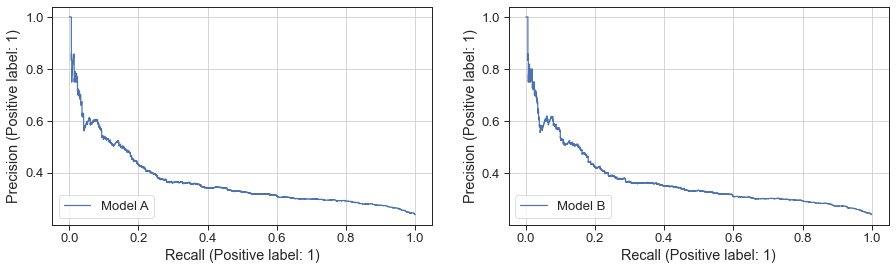

In [21]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

fig, ax = plt.subplots(1, 2, figsize=(15,4))
PrecisionRecallDisplay.from_estimator(model_A, X_test, y_test, ax=ax[0], label="Model A")
PrecisionRecallDisplay.from_estimator(model_B, X_test, y_test, ax=ax[1], label="Model B")
plt.show()

### Precision and Recall vs Threshold

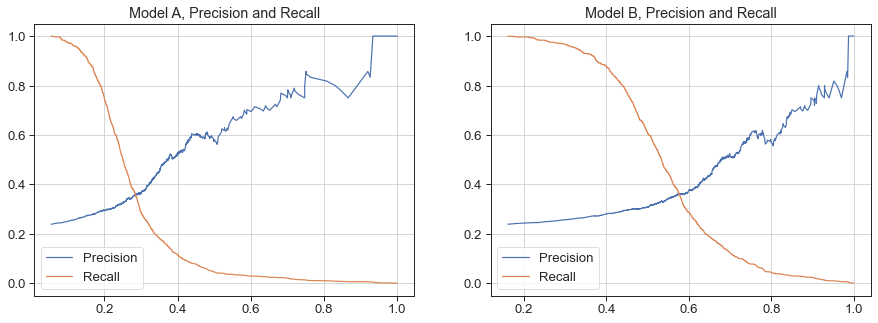

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Model A
precision, recall, threshold = precision_recall_curve(y_test, model_A.predict_proba(X_test)[:, 1])
sns.lineplot(x=threshold, y=precision[:-1], ax=ax[0], label="Precision")
sns.lineplot(x=threshold, y=recall[:-1], ax=ax[0], label="Recall")
ax[0].title.set_text("Model A, Precision and Recall")

# Model B
precision, recall, threshold = precision_recall_curve(y_test, model_B.predict_proba(X_test)[:, 1])
sns.lineplot(x=threshold, y=precision[:-1], ax=ax[1], label="Precision")
sns.lineplot(x=threshold, y=recall[:-1], ax=ax[1], label="Recall")
ax[1].title.set_text("Model B, Precision and Recall")

plt.show()

### Feature Importance Correlations

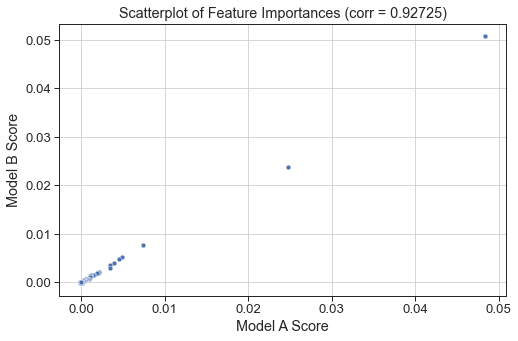

In [23]:
from scipy.stats import spearmanr

spearmanr(results_df["Model A"], results_df["Model B"])
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_A, y=data_B)
plt.title(f"Scatterplot of Feature Importances (corr = {spearmanr(data_A, data_B).correlation:.5})")
plt.ylabel("Model B Score")
plt.xlabel("Model A Score")
plt.show()